### 학습이 진행되는 동안 신경망의 일부 유닛 제외
    - 일반적으로 0.2 ~ 0.5 사용

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.datasets import cifar10

#### 데이터 로드

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 데이터 정규화

In [3]:
x_train = x_train/255
x_test = x_test/255

#### y train 인코딩

In [4]:
y_trainone = to_categorical(y_train)

#### 학습

In [6]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides = 1, 
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add(Dropout(0.2))

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu') )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add(Dropout(0.2))

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu') )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add(Dropout(0.2))

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu') )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
h = model.fit( x_train, y_trainone, epochs=10, validation_split= 0.2 )

Epoch 1/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.7129 - acc: 0.3625 - val_loss: 1.3427 - val_acc: 0.5087
Epoch 2/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2667 - acc: 0.5403 - val_loss: 1.0803 - val_acc: 0.6104
Epoch 3/10
1250/1250 [==============================] - 52s 42ms/step - loss: 1.0836 - acc: 0.6130 - val_loss: 1.0218 - val_acc: 0.6361
Epoch 4/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.9670 - acc: 0.6544 - val_loss: 0.8878 - val_acc: 0.6843
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.8843 - acc: 0.6896 - val_loss: 0.8549 - val_acc: 0.6999
Epoch 6/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.8102 - acc: 0.7133 - val_loss: 0.7917 - val_acc: 0.7233
Epoch 7/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.7527 - acc: 0.7340 - val_loss: 0.7545 - val_acc: 0.7365
Epoch 8/10
1250/1250 [==========================

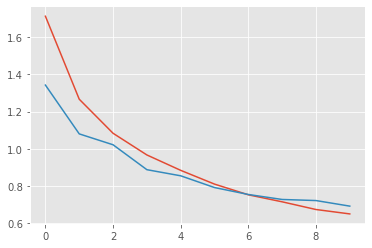

In [7]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

In [ ]:
#epoch 더 필요할듯